In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = r"eighthr.data.csv"
custom_column_names = ['WSR0', 'WSR1']
df = pd.read_csv(url, header=None, parse_dates=[0], index_col=[0], na_values=['?'], names=custom_column_names + list(range(3, 74)),date_format='%Y-%m-%d')
df = df.dropna()

In [3]:
df["WSR0"] = df["WSR0"].astype(float)
df["WSR1"] = df["WSR1"].astype(float)

In [4]:
df = pd.DataFrame(df,columns = ["WSR0","WSR1"])

In [5]:
df

,WSR0,WSR1
1/1/1998,0.8,1.8
1/2/1998,2.8,3.2
1/3/1998,2.9,2.8
1/4/1998,4.7,3.8
1/7/1998,3.7,3.2
...,...,...
12/27/2004,0.3,0.4
12/28/2004,1.0,1.4
12/29/2004,0.8,0.8
12/30/2004,1.3,0.9


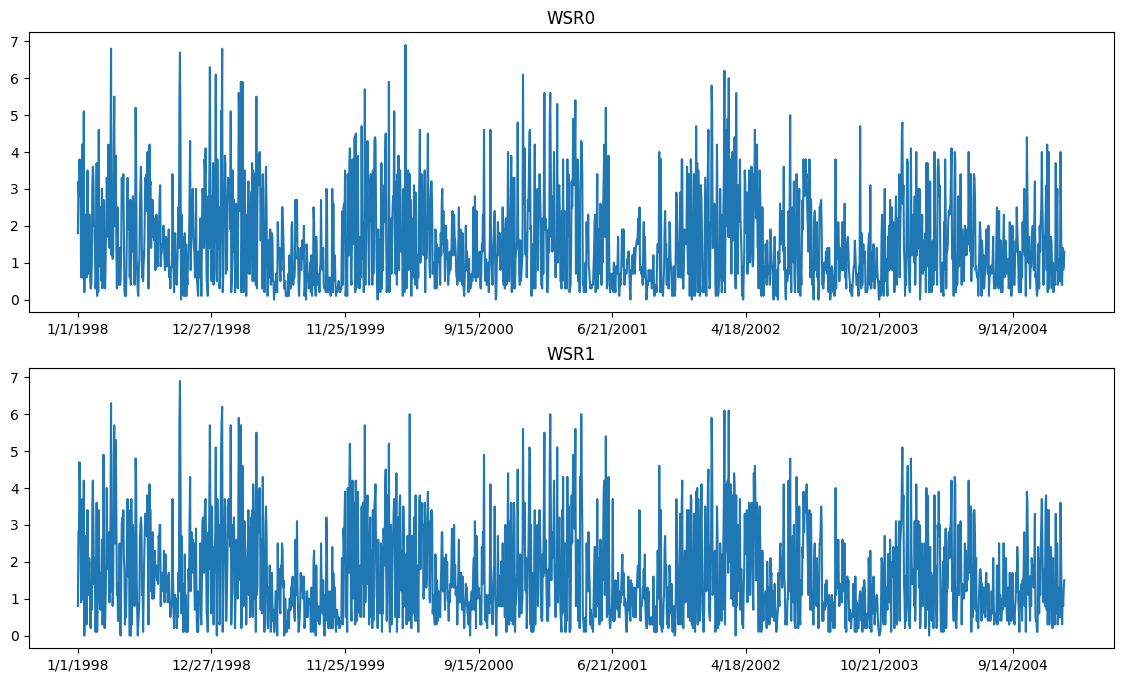

In [6]:
df["WSR0"] = df["WSR0"].astype(float)
df["WSR1"] = df["WSR1"].astype(float)

fig, axes = plt.subplots(2, 1, figsize=(14, 8))
df['WSR1'].plot(ax=axes[0], title='WSR0')
df['WSR0'].plot(ax=axes[1], title='WSR1')
plt.show()

In [7]:
print('WSR0 causes WSR1')
print('---')
granger1 = grangercausalitytests(df[['WSR0', 'WSR1']], maxlag=2)  # Testing with 2 lags
print('\nWSR1 causes WSR0')
print('---')
granger2 = grangercausalitytests(df[['WSR1', 'WSR0']], maxlag=2)

WSR0 causes WSR1
---

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.1176  , p=0.0238  , df_denom=1843, df_num=1
ssr based chi2 test:   chi2=5.1260  , p=0.0236  , df=1
likelihood ratio test: chi2=5.1189  , p=0.0237  , df=1
parameter F test:         F=5.1176  , p=0.0238  , df_denom=1843, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3865  , p=0.0922  , df_denom=1840, df_num=2
ssr based chi2 test:   chi2=4.7860  , p=0.0914  , df=2
likelihood ratio test: chi2=4.7798  , p=0.0916  , df=2
parameter F test:         F=2.3865  , p=0.0922  , df_denom=1840, df_num=2

WSR1 causes WSR0
---

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=12.5489 , p=0.0004  , df_denom=1843, df_num=1
ssr based chi2 test:   chi2=12.5693 , p=0.0004  , df=1
likelihood ratio test: chi2=12.5267 , p=0.0004  , df=1
parameter F test:         F=12.5489 , p=0.0004  , df_denom=1843, df_num=1

Granger Causality
number of lags (no zero) 2

In [8]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[:train_size]

In [9]:
train

,WSR0,WSR1
1/1/1998,0.8,1.8
1/2/1998,2.8,3.2
1/3/1998,2.9,2.8
1/4/1998,4.7,3.8
1/7/1998,3.7,3.2
...,...,...
9/21/2003,1.5,1.1
9/22/2003,1.2,1.3
9/23/2003,0.2,0.2
9/24/2003,0.3,0.2


In [10]:
model = VAR(train) 
sorted_model = model.select_order(maxlags=20)
print(sorted_model.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0      -0.8436     -0.8364      0.4301     -0.8409
1      -0.9681    -0.9464*      0.3798    -0.9600*
2      -0.9643     -0.9280      0.3813     -0.9508
3      -0.9626     -0.9119      0.3819     -0.9437
4      -0.9638     -0.8985      0.3814     -0.9395
5      -0.9671     -0.8874      0.3802     -0.9374
6      -0.9750     -0.8807      0.3772     -0.9398
7      -0.9711     -0.8623      0.3787     -0.9305
8      -0.9732     -0.8498      0.3779     -0.9271
9      -0.9709     -0.8331      0.3787     -0.9195
10    -0.9815*     -0.8292     0.3748*     -0.9247
11     -0.9810     -0.8142      0.3749     -0.9188
12     -0.9805     -0.7992      0.3751     -0.9129
13     -0.9782     -0.7824      0.3760     -0.9051
14     -0.9740     -0.7636      0.3776     -0.8955
15     -0.9724     -0.7475      0.3782     -0.8885
16     -0.9682     -0.7288     

C:\Users\Sailesh\.conda\envs\TimeSeriesResearch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [11]:
var_model = VARMAX(train, order=(5, 0), enforce_stationarity=True)
fit_model = var_model.fit(disp=False)
print(fit_model.summary())

C:\Users\Sailesh\.conda\envs\TimeSeriesResearch\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                           Statespace Model Results                           
Dep. Variable:       ['WSR0', 'WSR1']   No. Observations:                 1477
Model:                         VAR(5)   Log Likelihood               -3460.435
                          + intercept   AIC                           6970.870
Date:                Tue, 08 Apr 2025   BIC                           7103.315
Time:                        12:15:21   HQIC                          7020.249
Sample:                             0                                         
                               - 1477                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.01, 0.00   Jarque-Bera (JB):      171.73, 7048.13
Prob(Q):                        0.92, 0.95   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.79, 0.94   Skew:                       0.78, 0.87
Prob(H) (two-sided):            0.01,

In [12]:
n_forecast = 12
pred = fit_model.get_prediction()
preds = pred.predicted_mean
preds.columns = ['WSR0 Predictions', 'WSR1 Predictions']

In [13]:
test_vs_pred = pd.concat([test, preds], axis=1)

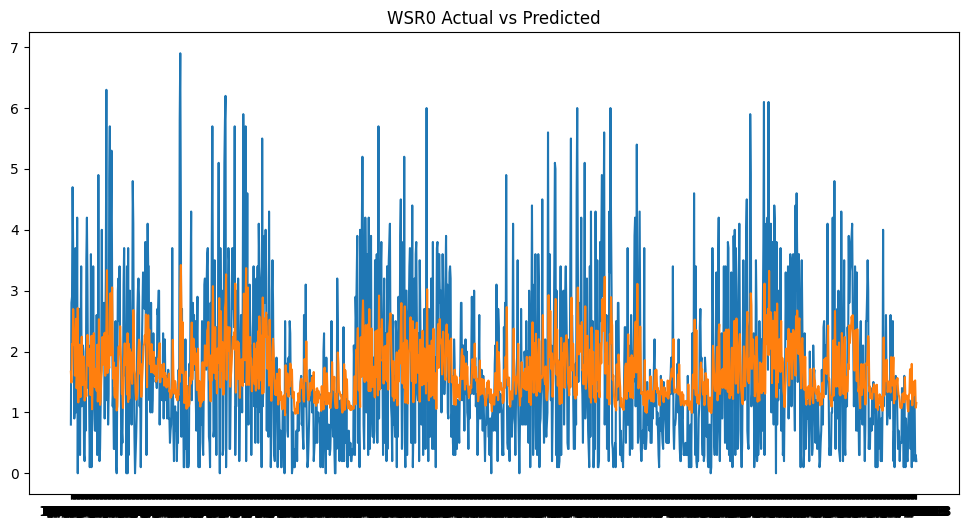

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(test_vs_pred[['WSR0', 'WSR0 Predictions']])
plt.title('WSR0 Actual vs Predicted')
plt.show()

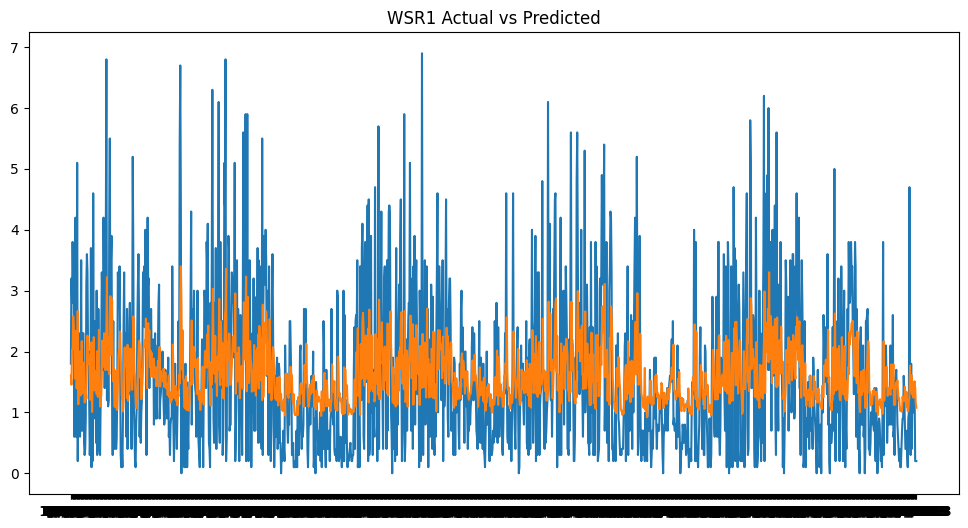

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(test_vs_pred[['WSR1', 'WSR1 Predictions']])
plt.title('WSR1 Actual vs Predicted')
plt.show()

In [16]:
mse_wsr1 = mean_squared_error(test_vs_pred['WSR1'], test_vs_pred['WSR1 Predictions'])
mse_wsr0 = mean_squared_error(test_vs_pred['WSR0'], test_vs_pred['WSR0 Predictions'])

print(f"\nMSE for WSR1: {mse_wsr1:.4f}")
print(f"MSE for WSR0: {mse_wsr0:.4f}")


MSE for WSR1: 1.4545
MSE for WSR0: 1.4649
